In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
df=pd.read_csv('/content/in-vehicle-coupon-recommendation.csv')

In [200]:
df.describe()
df.shape

(12684, 26)

In [201]:
df.dtypes

,0
destination,object
passanger,object
weather,object
temperature,int64
time,object
coupon,object
expiration,object
gender,object
age,object
maritalStatus,object


In [202]:
for col in df.columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts(dropna=False))  # Includes NaN counts
    print(f"Missing values: {df[col].isna().sum()}")  # Shows total missing values
    print("-" * 50)

Value counts for destination:
destination
No Urgent Place    6283
Home               3237
Work               3164
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for passanger:
passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for weather:
weather
Sunny    10069
Snowy     1405
Rainy     1210
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for temperature:
temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for time:
time
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for coupon:
coupon
Coffee House          

for col in df.columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts(dropna=False))  # Includes NaN counts
    print(f"Missing values: {df[col].isna().sum()}")  # Shows total missing values
    print("-" * 50)

In [203]:
#dropped columns car and 'toCoupon_GEQ5min' from the dataframe
#as thare is only 1 value in the data
df.shape
df = df.drop(columns=['car', 'toCoupon_GEQ5min'], errors='ignore')

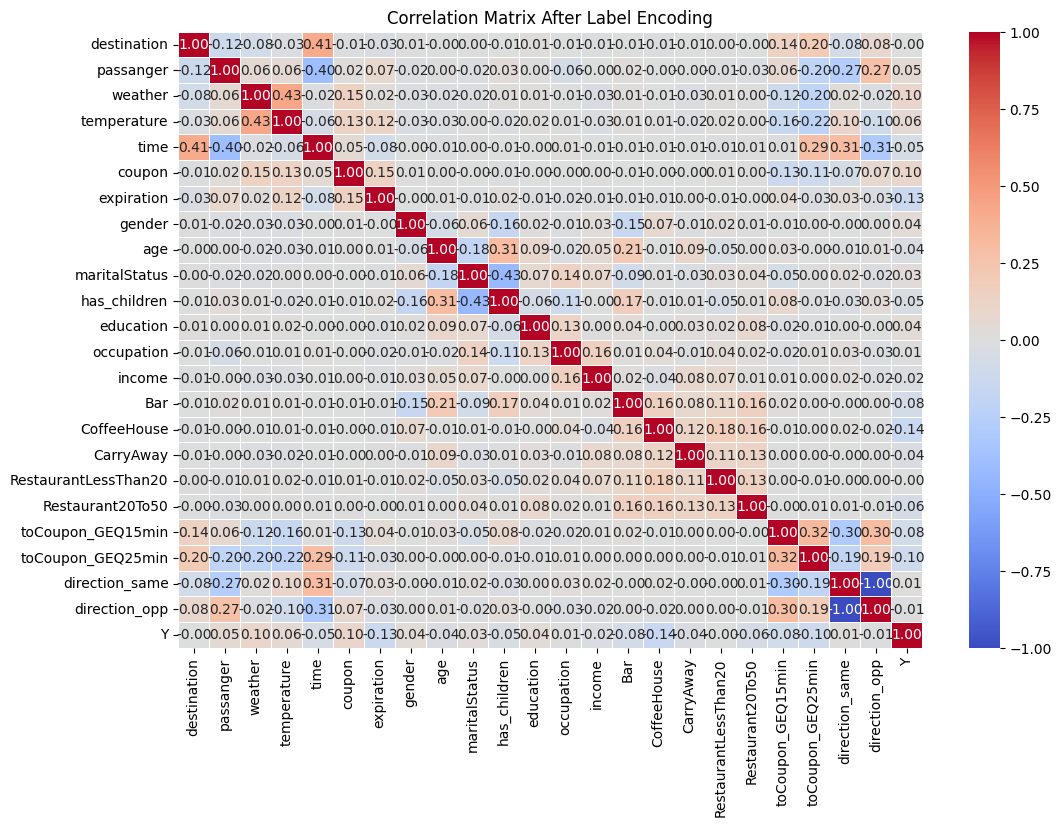

In [204]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns that require encoding
categorical_columns = df.select_dtypes(include=['object', 'category', 'int64', 'int32']).columns

# Dictionary to store encoders
encoders = {}

# Apply Label Encoding and store the mappings
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Encode column
    encoders[col] = le  # Save encoder

# Save encoders for later decoding
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix After Label Encoding")
plt.show()

In [205]:
df = df.fillna(df.mode().iloc[0])
df.shape

(12684, 24)

In [206]:
df = df.loc[:, ~df.columns.duplicated()]
df.shape

(12684, 24)

In [207]:
df.to_csv('CLEANED_CLASS_DATA.csv', index=False)


In [208]:
for col in df.columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts(dropna=False))  # Includes NaN counts
    print(f"Missing values: {df[col].isna().sum()}")  # Shows total missing values
    print("-" * 50)

Value counts for destination:
destination
1    6283
0    3237
2    3164
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for passanger:
passanger
0    7305
1    3298
3    1075
2    1006
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for weather:
weather
2    10069
1     1405
0     1210
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for temperature:
temperature
2    6528
1    3840
0    2316
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for time:
time
3    3230
4    3164
0    2275
2    2009
1    2006
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for coupon:
coupon
2    3996
4    2786
1    2393
0    2017
3    1492
Name: count, dtype: int64
Missing values: 0
--------------------------------

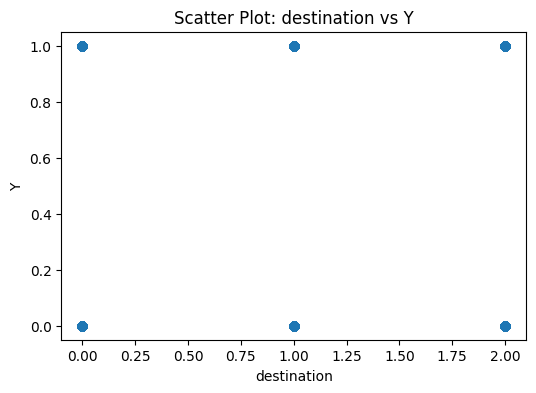

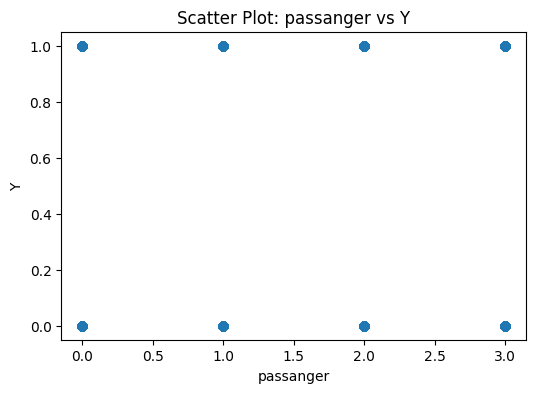

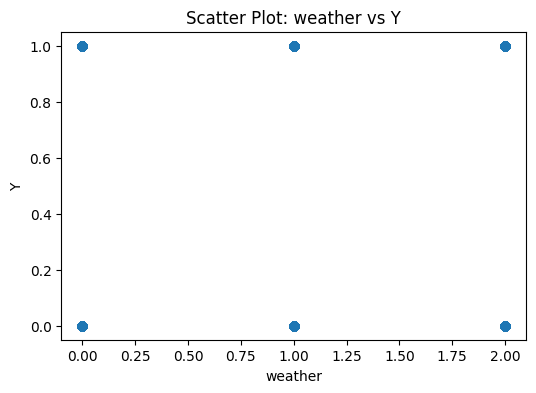

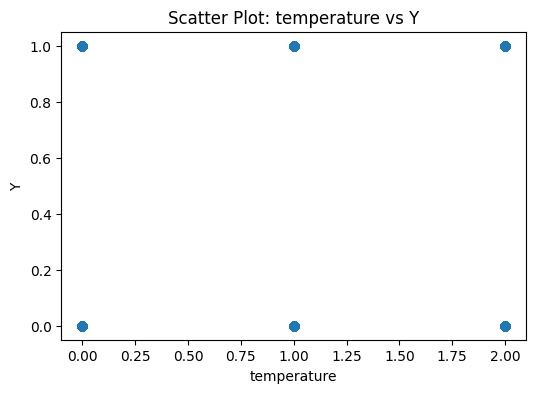

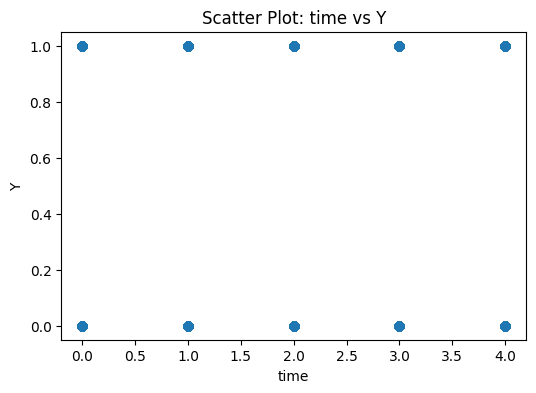

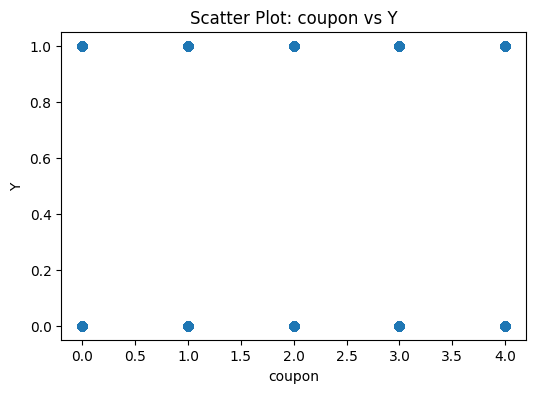

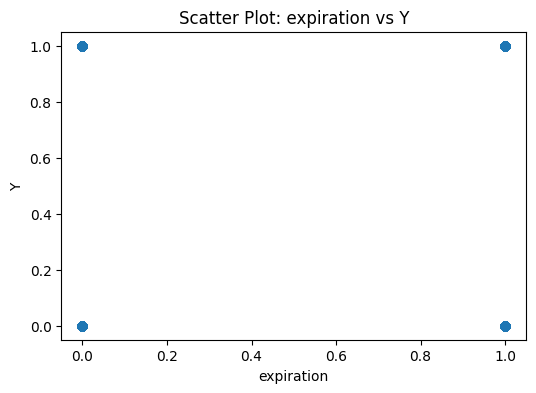

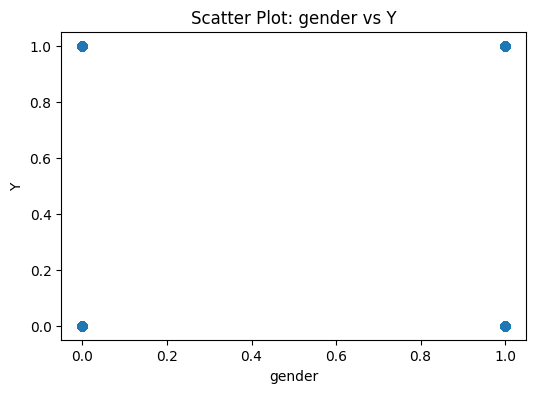

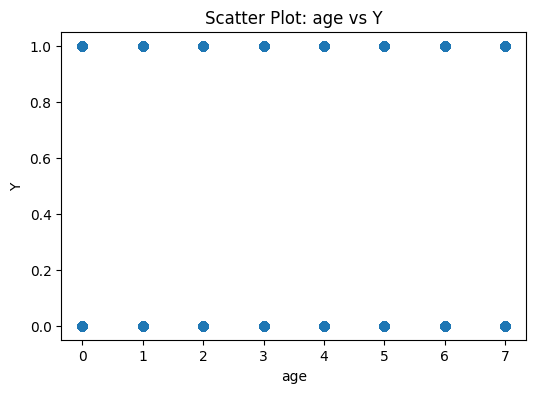

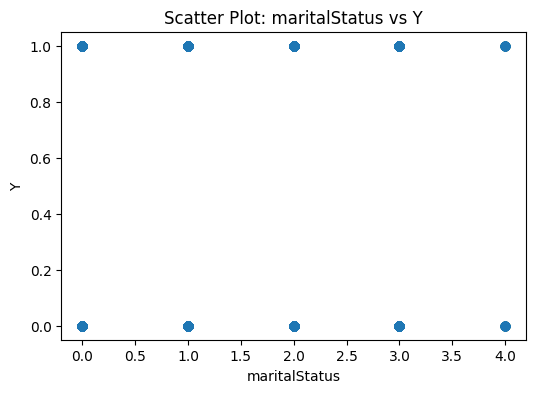

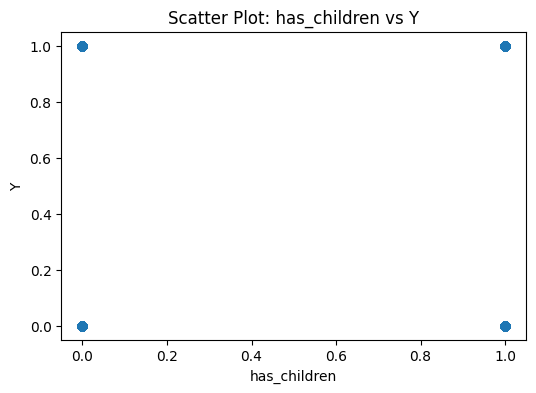

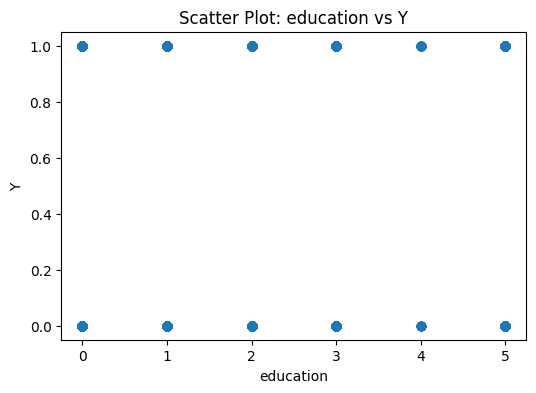

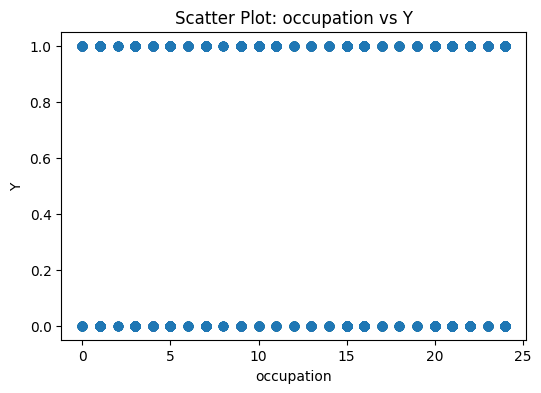

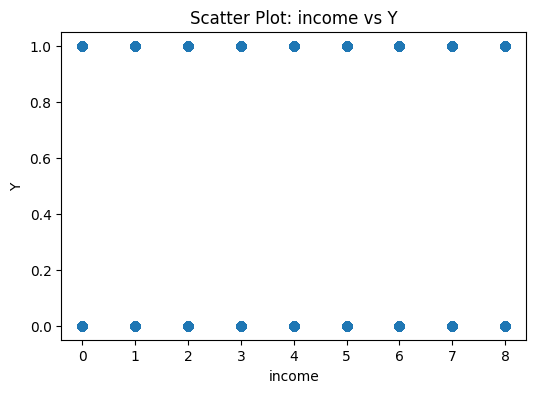

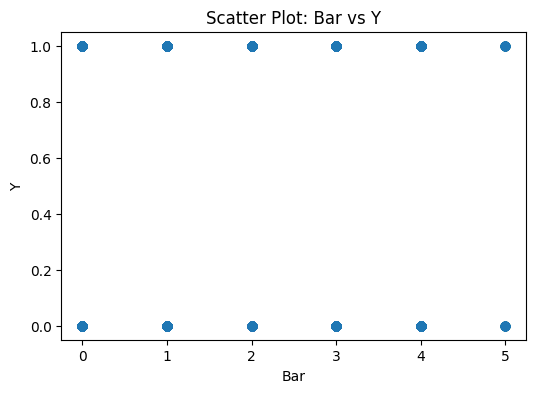

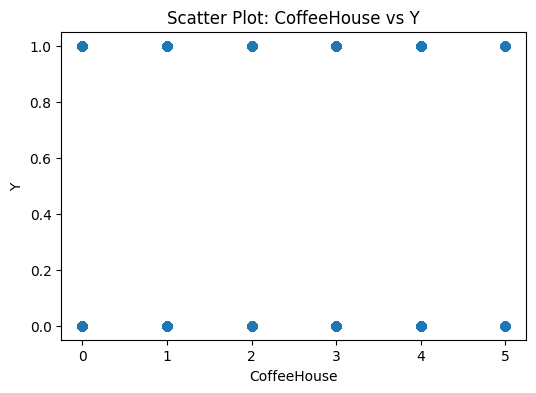

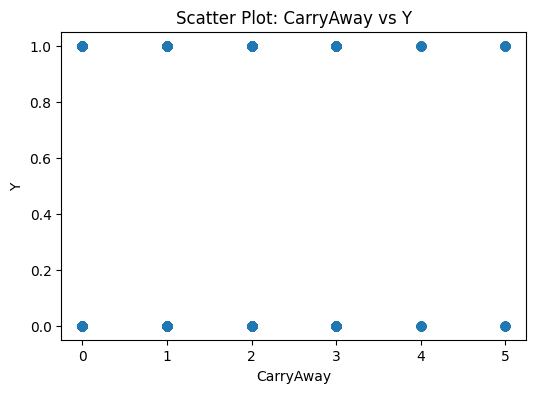

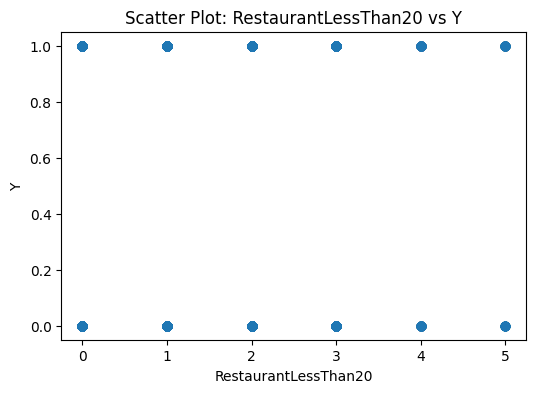

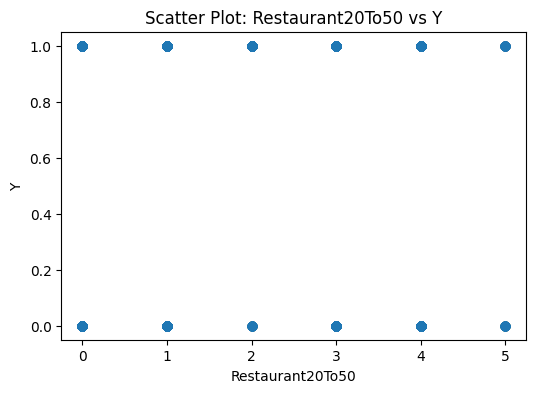

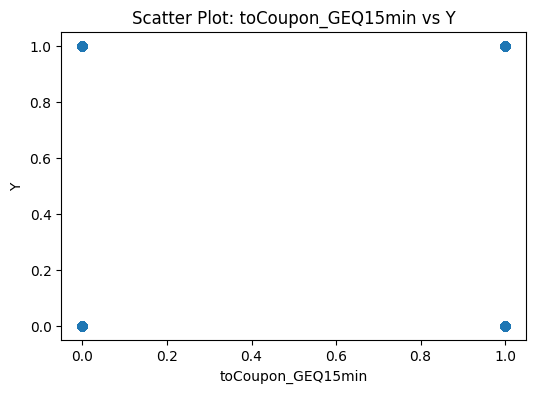

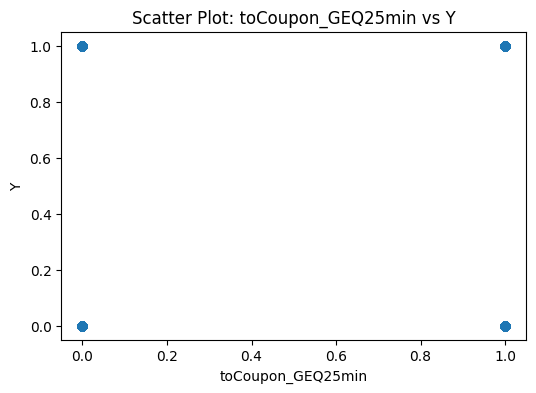

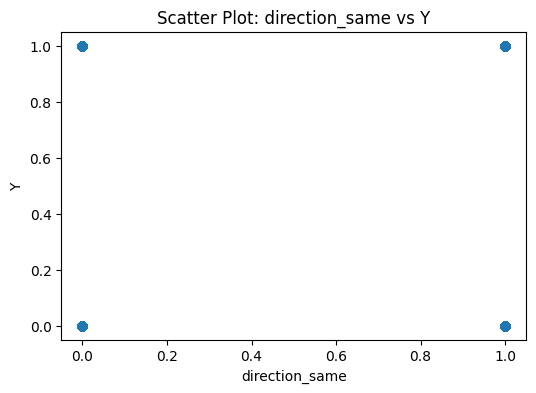

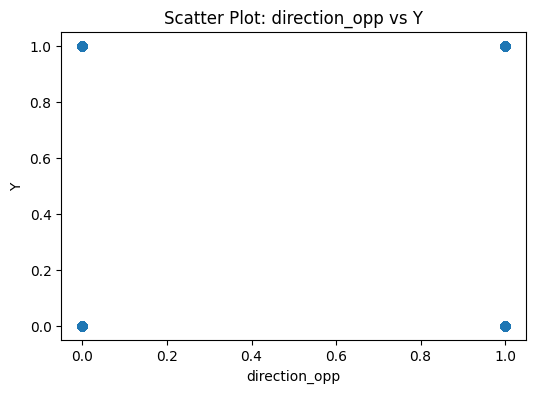

In [209]:
for col in df.columns:
    if col != 'Y':
        plt.figure(figsize=(6,4))
        plt.scatter(df[col], df['Y'], alpha=0.5)
        plt.xlabel(col)
        plt.ylabel('Y')
        plt.title(f'Scatter Plot: {col} vs Y')
        plt.show()

In [210]:
print(df.columns.tolist())  # Print all column names to check for typos or spaces


['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']


In [211]:
cols = ['occupation','maritalStatus', 'Bar', 'education', 'CoffeeHouse', 'CarryAway', 'Restaurant20To50']

for col in cols:
    print(f"\nValue counts for {col}:")

    # Get counts of 'Y' values grouped by the categorical column
    counts = df.groupby(col)['Y'].value_counts().unstack(fill_value=0)

    # Rename columns for clarity
    counts.columns = ['No (Y=0)', 'Yes (Y=1)']

    # Add total count per category
    counts['Total'] = counts.sum(axis=1)

    # Explicitly print full DataFrame without truncation
    print(counts.to_string())
    print('-' * 50)




Value counts for occupation:
            No (Y=0)  Yes (Y=1)  Total
occupation                            
0                 64        111    175
1                303        326    629
2                 18         26     44
3                234        310    544
4                123        118    241
5                610        798   1408
6                 48        106    154
7                449        494    943
8                 20         23     43
9                124        174    298
10                79        165    244
11                73        169    242
12                62         71    133
13               116        103    219
14                72         98    170
15               345        493    838
16               255        384    639
17                79         96    175
18                42         68    110
19                62        113    175
20               268        227    495
21               478        615   1093
22               617        967   

In [212]:
from sklearn.ensemble import IsolationForest

# Load dataset
df = pd.read_csv('/content/CLEANED_CLASS_DATA.csv')

# Frequency encoding for 'occupation'
occupation_counts = df["occupation"].value_counts()
df["occupation_encoded"] = df["occupation"].map(occupation_counts)

# Fit Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination rate if needed
df["outlier"] = iso_forest.fit_predict(df[["occupation_encoded"]])

# Count the number of outliers
outliers_removed = df[df["outlier"] == -1].shape[0]

# Remove detected outliers (-1 label indicates an outlier)
df_cleaned = df[df["outlier"] == 1].drop(columns=["outlier", "occupation_encoded"])

# Save the cleaned dataset
df_cleaned.to_csv("filtered_data.csv", index=False)

# Print the number of removed outliers
print(f"Outliers removed from 'occupation' column: {outliers_removed}")


Outliers removed from 'occupation' column: 628


In [213]:
df_cleaned.shape

(12056, 24)

In [214]:
# Remove rows from df_cleaned where the specified categorical values exist
df_cleaned = df_cleaned[
    ~(
        (df_cleaned["education"] == 4) |
        (df_cleaned["maritalStatus"] == 4) |
        (df_cleaned["Bar"].isin([5, 2])) |
        (df_cleaned["CoffeeHouse"] == 5) |
        (df_cleaned["CarryAway"].isin([4, 5]))
    )
]

# Save the cleaned dataset
df_cleaned.to_csv("filtered_data.csv", index=False)

# Print how many rows were removed
print(f"Rows removed after filtering: {df.shape[0] - df_cleaned.shape[0]}")
print("Final cleaned data saved as 'filtered_data.csv'.")



Rows removed after filtering: 1632
Final cleaned data saved as 'filtered_data.csv'.


In [215]:
for col in df_cleaned.columns:
    print(f"Value counts for {col}:")
    print(df_cleaned[col].value_counts(dropna=False))  # Includes NaN counts
    print(f"Missing values: {df_cleaned[col].isna().sum()}")  # Shows total missing values
    print("-" * 50)

Value counts for destination:
destination
1    5458
0    2828
2    2766
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for passanger:
passanger
0    6346
1    2843
3     961
2     902
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for weather:
weather
2    8864
1    1169
0    1019
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for temperature:
temperature
2    5748
1    3348
0    1956
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for time:
time
3    2825
4    2766
0    1975
2    1758
1    1728
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for coupon:
coupon
2    3504
4    2424
1    2075
0    1759
3    1290
Name: count, dtype: int64
Missing values: 0
-----------------------------------

In [216]:
df_cleaned.shape

(11052, 24)

CORRELATION ANALYSIS

In [217]:
dfc=df_cleaned

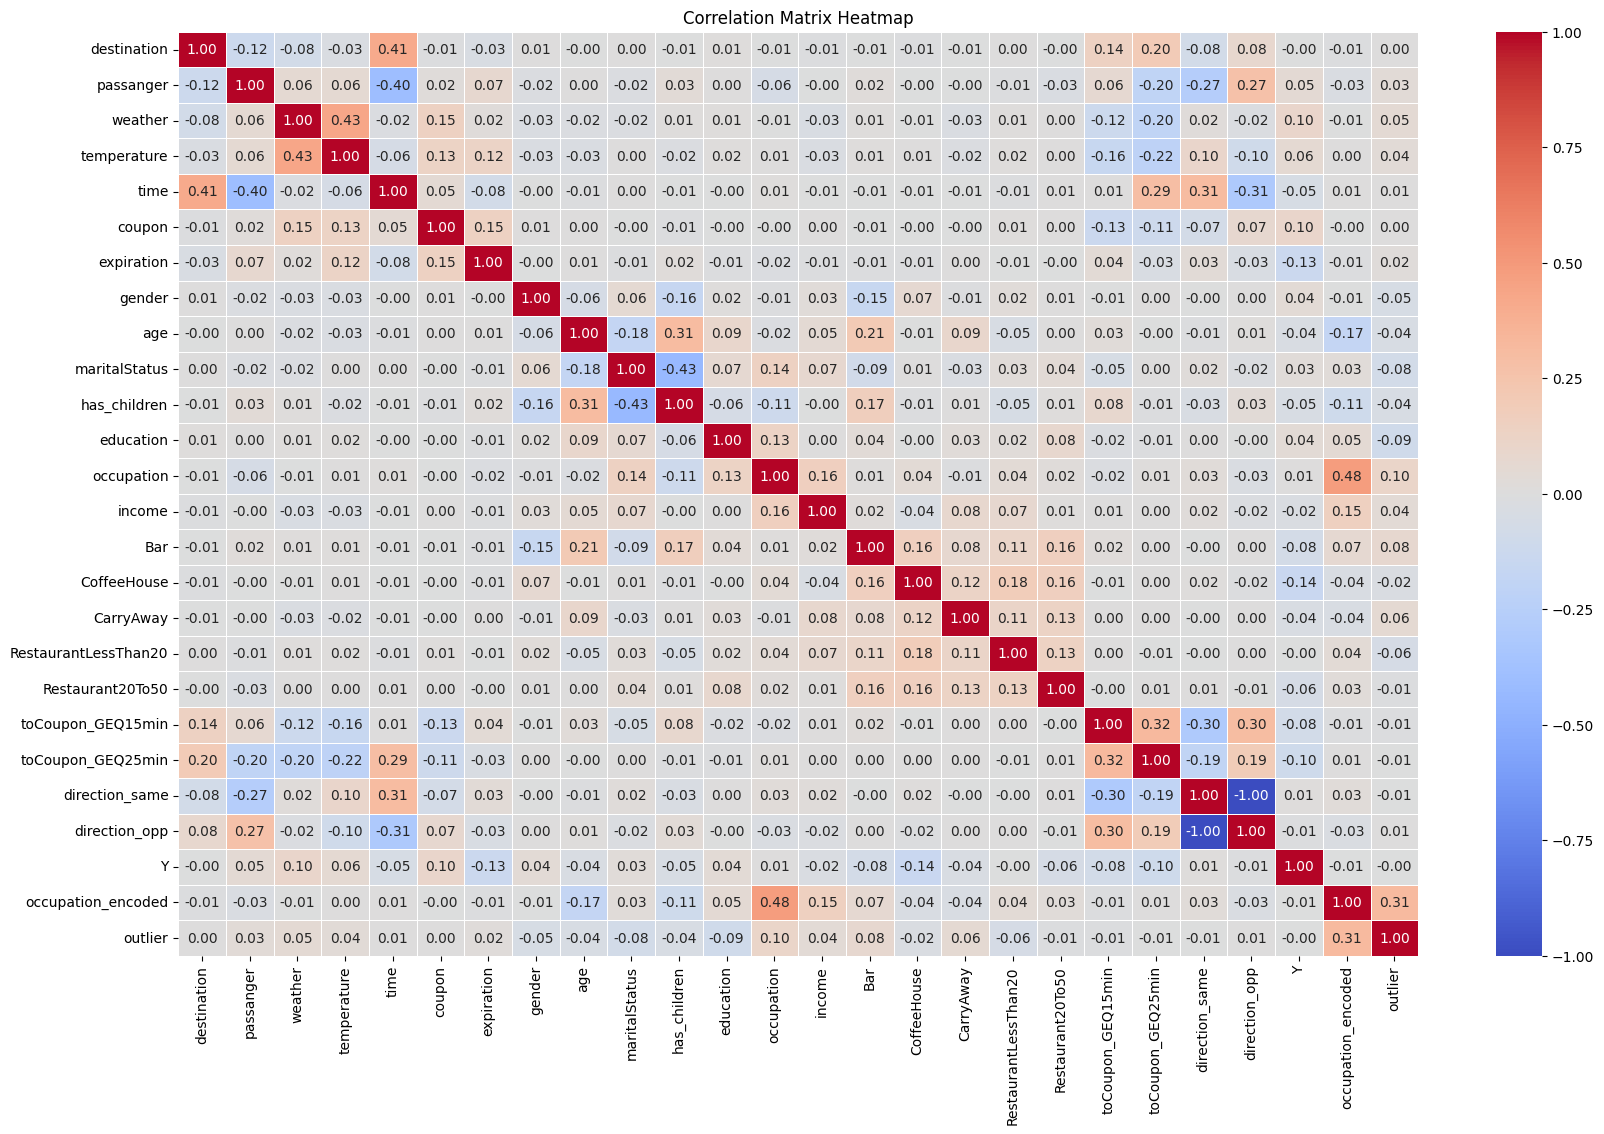

In [218]:
plt.figure(figsize=(20, 12))  # Set figure size
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix,
            annot=True,      # Show values inside the cells
            cmap="coolwarm", # Color scheme
            linewidths=0.5,  # Add gridlines
            fmt=".2f")       # Limit decimal places to 2

plt.title("Correlation Matrix Heatmap")
plt.show()


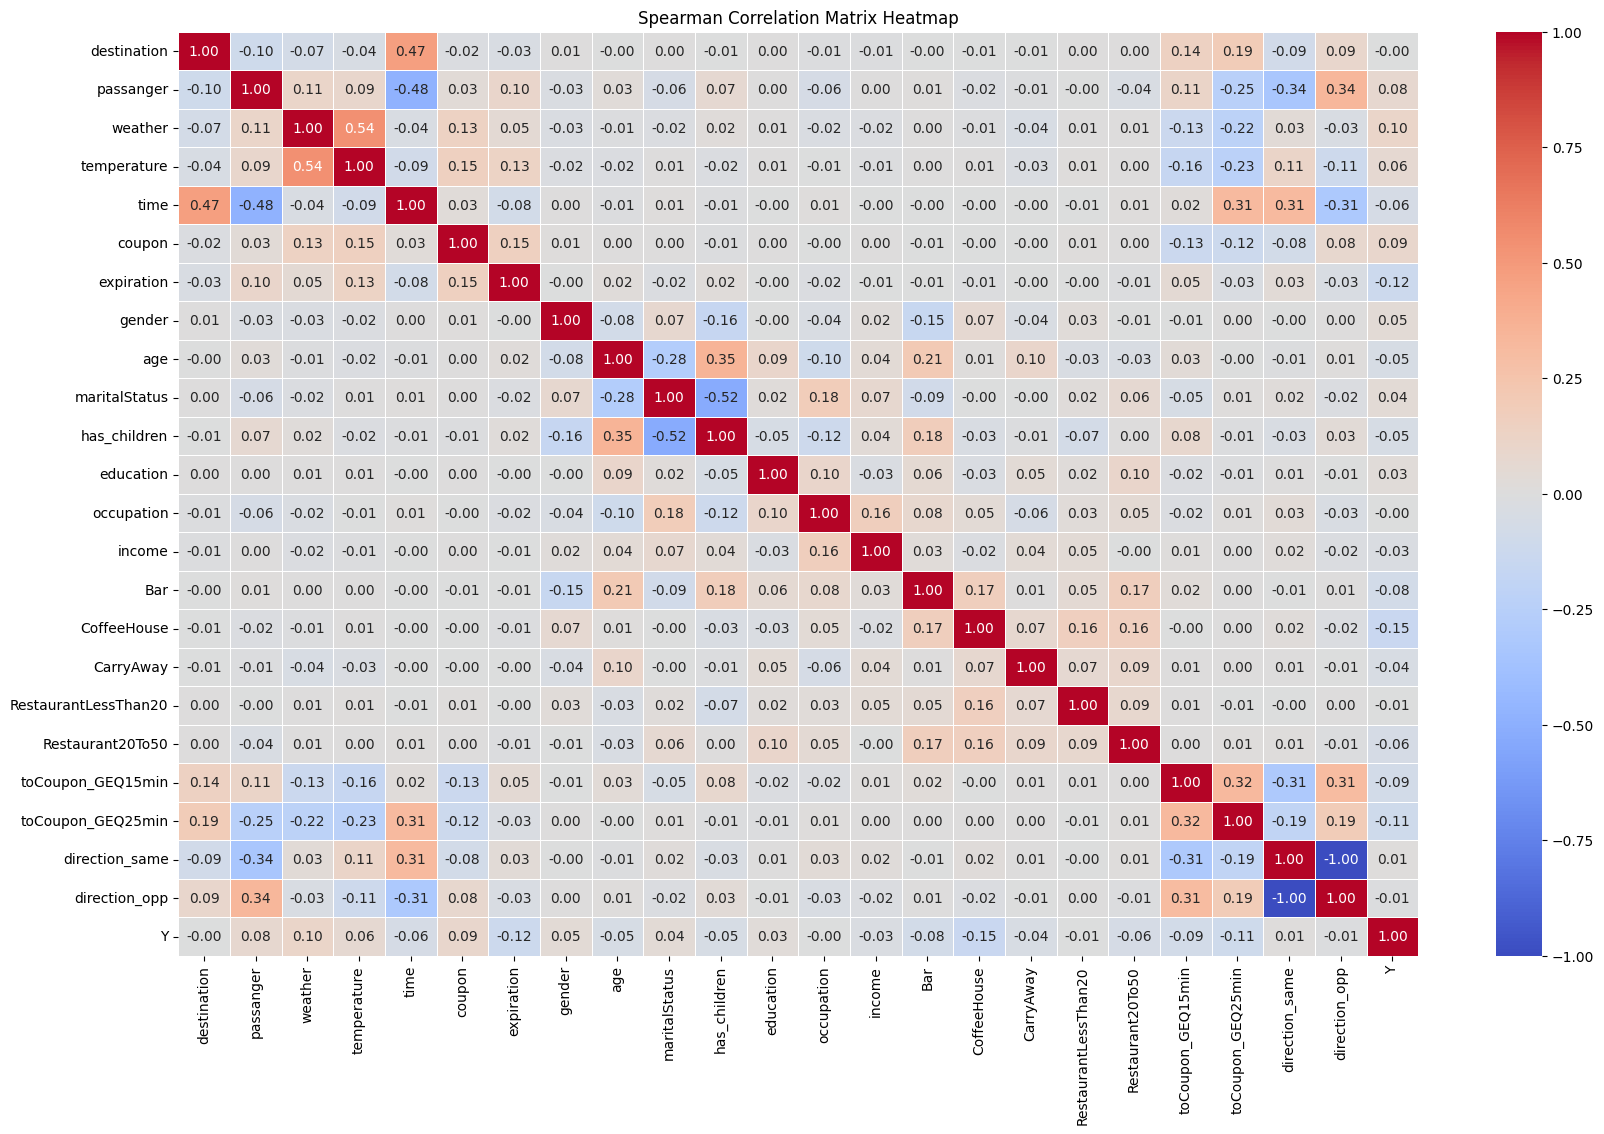

In [186]:
correlation_matrix = dfc.corr(method='spearman')

# Visualize with Heatmap
plt.figure(figsize=(20, 12))  # Set figure size

sns.heatmap(correlation_matrix,
            annot=True,      # Show values inside the cells
            cmap="coolwarm", # Color scheme
            linewidths=0.5,  # Add gridlines
            fmt=".2f")       # Limit decimal places to 2

plt.title("Spearman Correlation Matrix Heatmap")
plt.show()

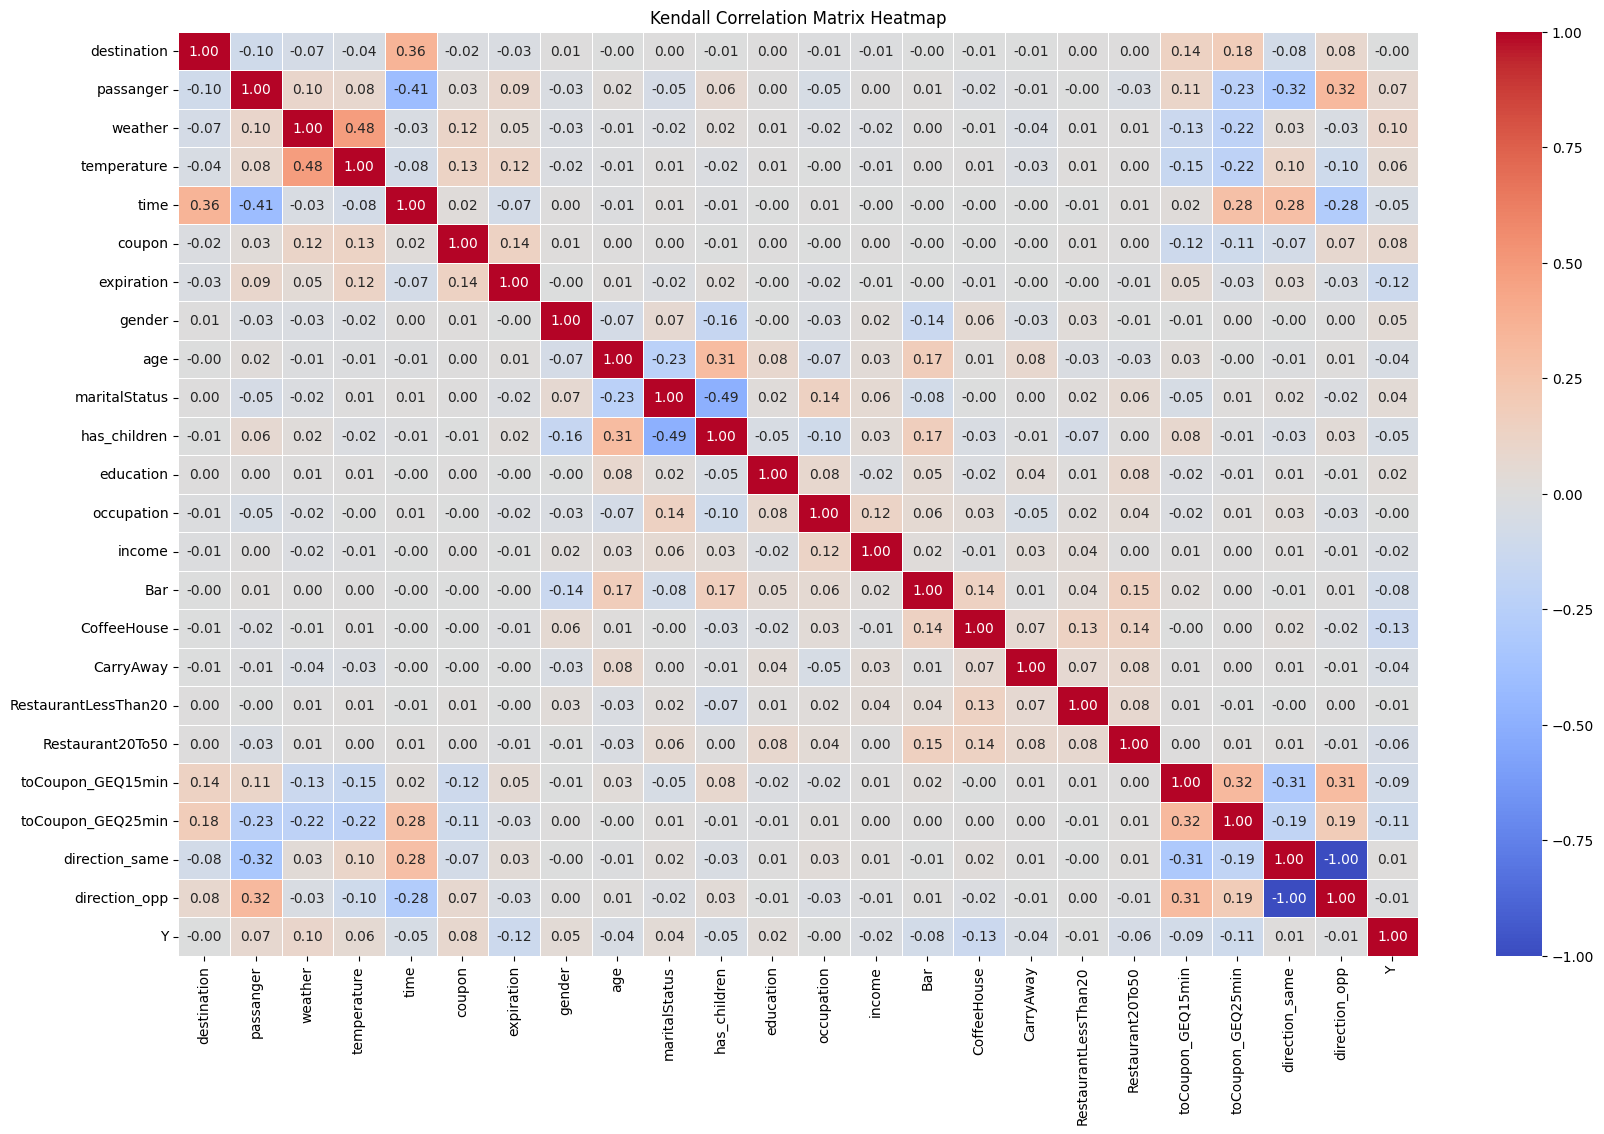

In [187]:
# Compute Kendall Correlation Matrix
correlation_matrix = dfc.corr(method='kendall')

# Visualize with Heatmap
plt.figure(figsize=(20, 12))  # Set figure size

sns.heatmap(correlation_matrix,
            annot=True,      # Show values inside the cells
            cmap="coolwarm", # Color scheme
            linewidths=0.5,  # Add gridlines
            fmt=".2f")       # Limit decimal places to 2

plt.title("Kendall Correlation Matrix Heatmap")
plt.show()

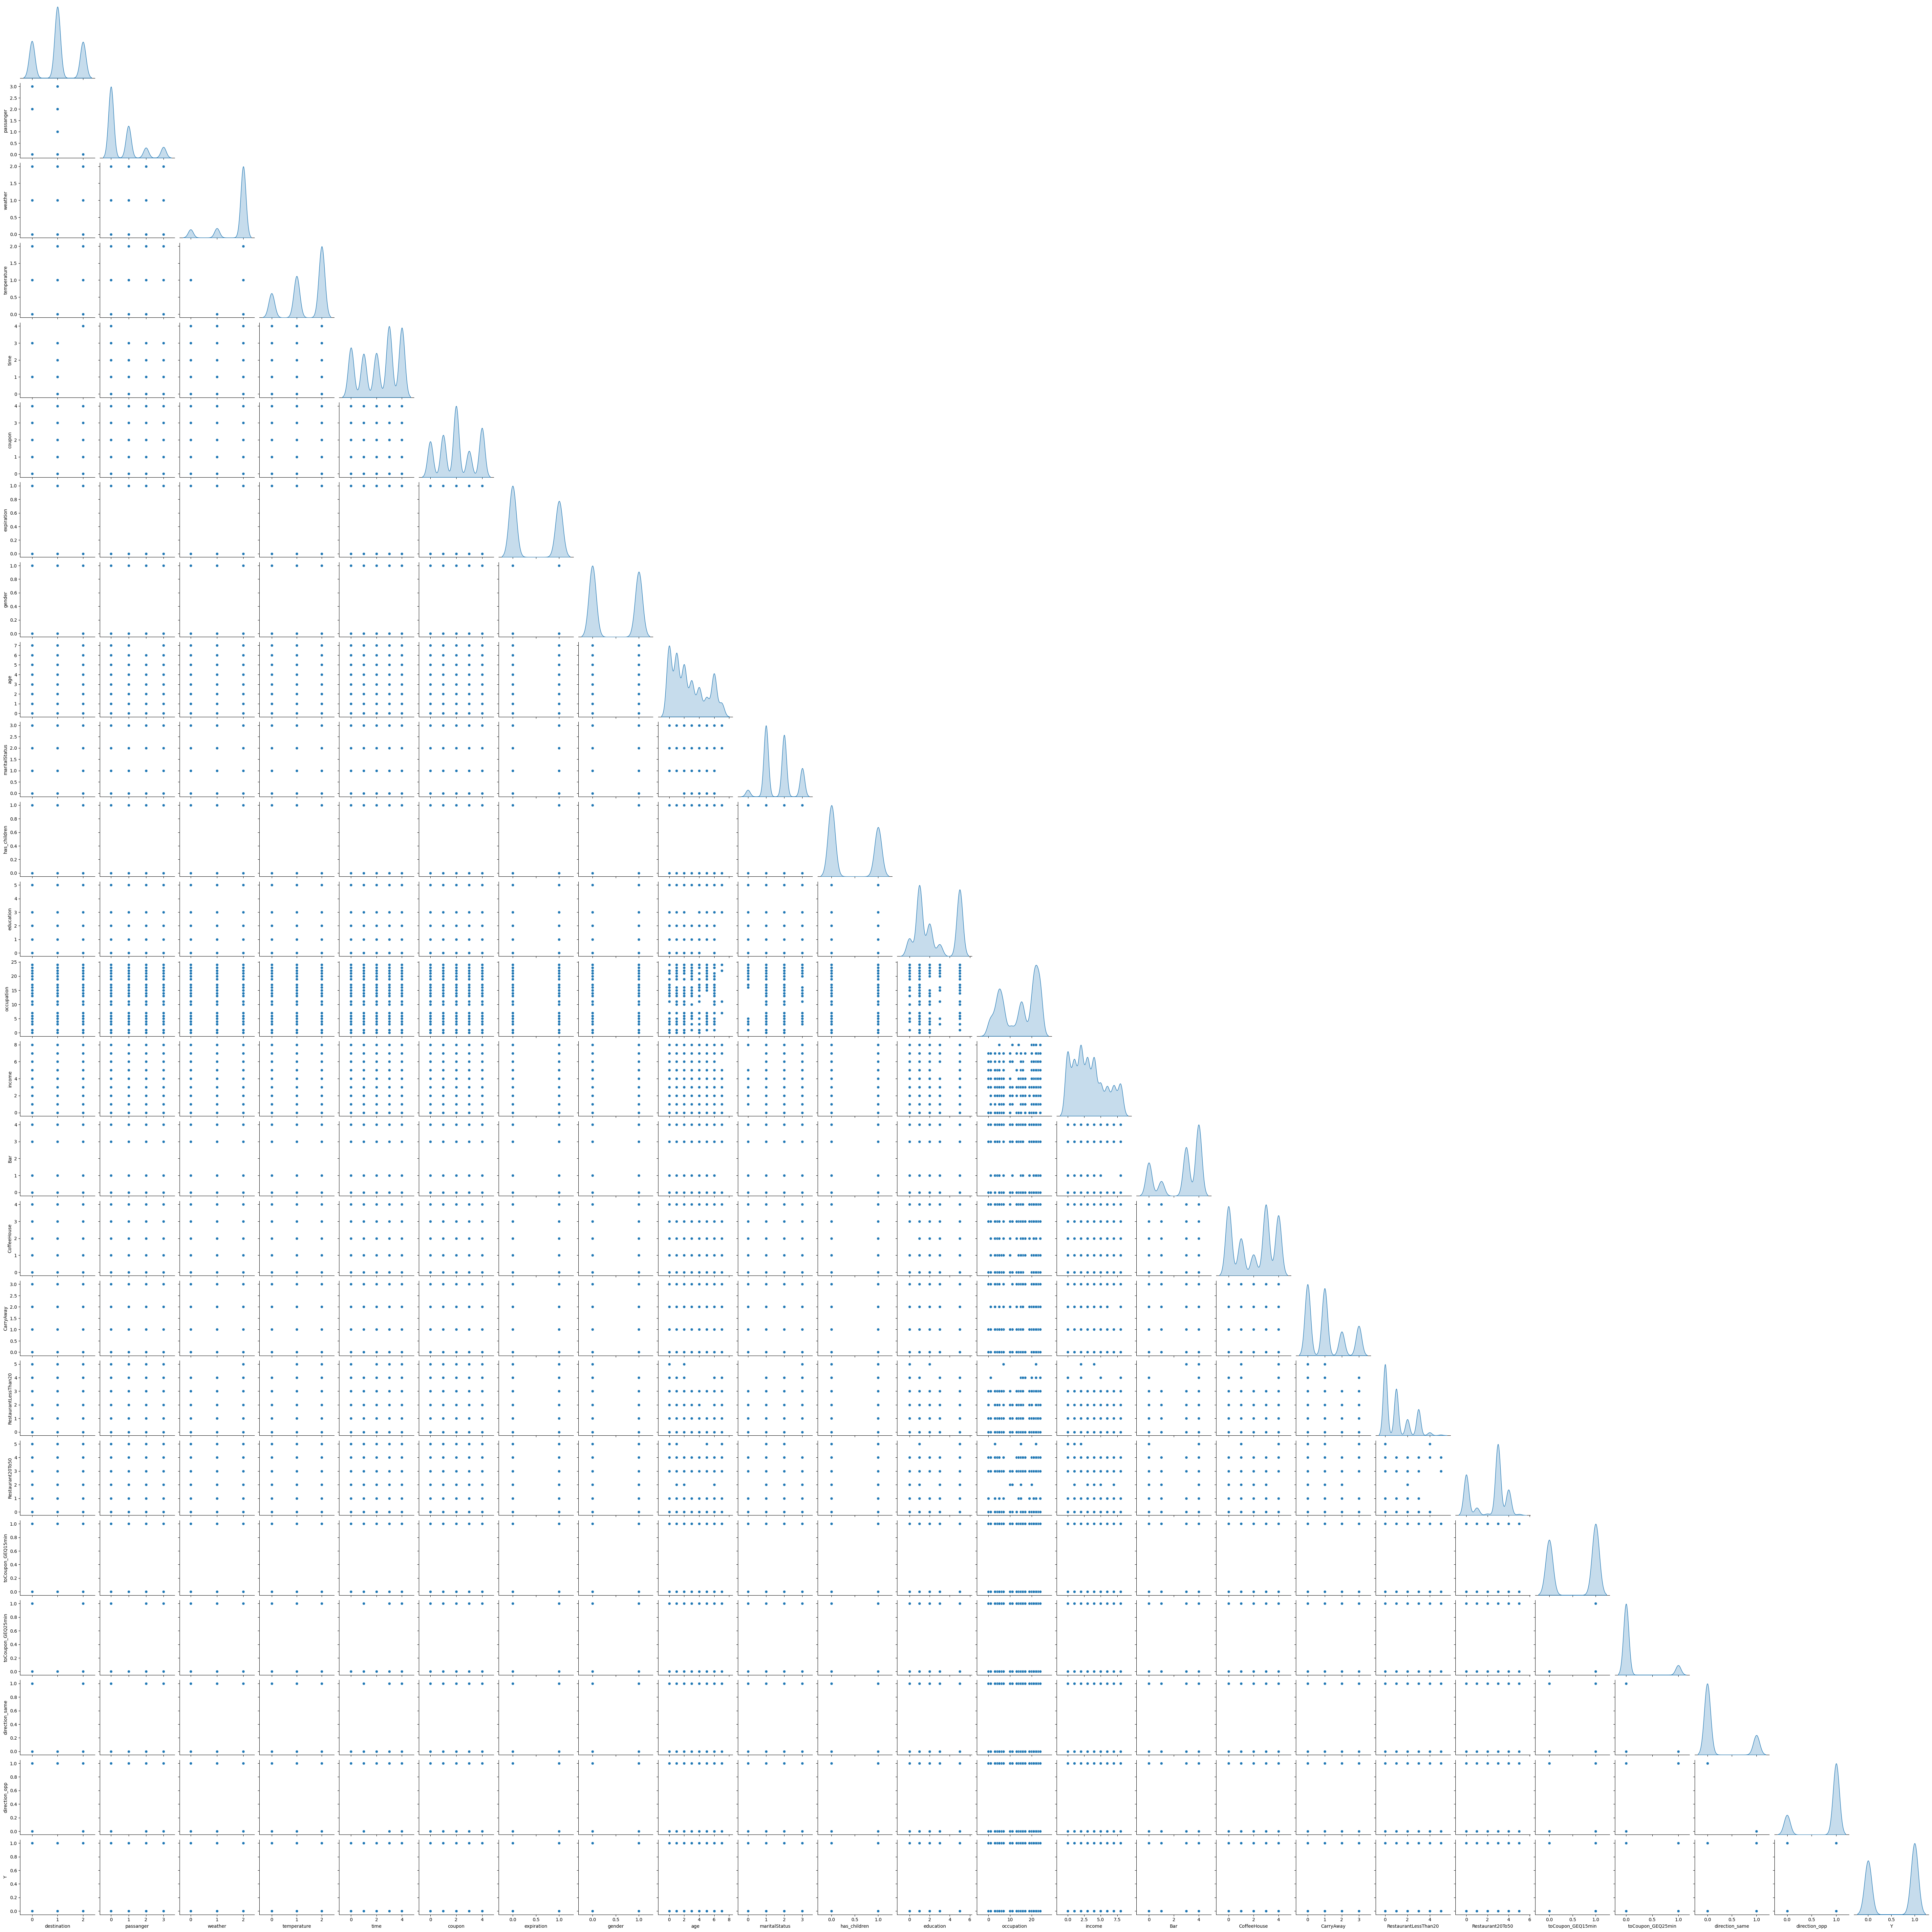

In [95]:
sns.pairplot(dfc, diag_kind="kde", corner=True)  # 'kde' for smoothed histograms, 'corner=True' removes duplicate plots

plt.show()

In [219]:
import pickle
import numpy as np

# Load the saved encoders
with open('label_encoders.pkl', 'rb') as f:
    encoders = pickle.load(f)

# Select only the categorical columns that were encoded
categorical_columns = list(encoders.keys())  # Use only stored encoders

# Decode each column
for col in categorical_columns:
    if col in df_cleaned.columns:
        try:
            # Convert column to integer for compatibility
            df_cleaned[col] = df_cleaned[col].astype(int)

            # Get valid encoded values
            valid_classes = np.intersect1d(df_cleaned[col].unique(), np.arange(len(encoders[col].classes_)))

            # Create a mask for valid values
            valid_mask = df_cleaned[col].isin(valid_classes)

            # Decode only valid values
            df_cleaned.loc[valid_mask, col] = encoders[col].inverse_transform(df_cleaned.loc[valid_mask, col])

            # Convert back to object (string) type
            df_cleaned[col] = df_cleaned[col].astype(str)

        except Exception as e:
            print(f"Error decoding column {col}: {e}")

# Verify the decoding process
print("Decoding completed. Check df_cleaned.dtypes and df_cleaned.head().")
display(df_cleaned.dtypes)
display(df_cleaned.head())



Decoding completed. Check df_cleaned.dtypes and df_cleaned.head().


<ipython-input-219-6bd436c0a36e>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['No Urgent Place' 'No Urgent Place' 'No Urgent Place' ... 'Work' 'Work'
 'Work']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[valid_mask, col] = encoders[col].inverse_transform(df_cleaned.loc[valid_mask, col])
<ipython-input-219-6bd436c0a36e>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['Alone' 'Friend(s)' 'Friend(s)' ... 'Alone' 'Alone' 'Alone']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cleaned.loc[valid_mask, col] = encoders[col].inverse_transform(df_cleaned.loc[valid_mask, col])
<ipython-input-219-6bd436c0a36e>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future versio

,0
destination,object
passanger,object
weather,object
temperature,object
time,object
coupon,object
expiration,object
gender,object
age,object
maritalStatus,object


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,never,less1,4~8,4~8,less1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,never,less1,4~8,4~8,less1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,never,less1,4~8,4~8,less1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,never,less1,4~8,4~8,less1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,never,less1,4~8,4~8,less1,0,0,0,1,0


In [220]:
for col in df_cleaned.columns:
    print(f"Value counts for {col}:")
    print(df_cleaned[col].value_counts(dropna=False))  # Includes NaN counts
    print(f"Missing values: {df[col].isna().sum()}")  # Shows total missing values
    print("-" * 50)

Value counts for destination:
destination
No Urgent Place    5458
Home               2828
Work               2766
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for passanger:
passanger
Alone        6346
Friend(s)    2843
Partner       961
Kid(s)        902
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for weather:
weather
Sunny    8864
Snowy    1169
Rainy    1019
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for temperature:
temperature
80    5748
55    3348
30    1956
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for time:
time
6PM     2825
7AM     2766
10AM    1975
2PM     1758
10PM    1728
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for coupon:
coupon
Coffee House             

In [221]:

print(df_cleaned.dtypes)

destination             object
passanger               object
weather                 object
temperature             object
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children            object
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ15min       object
toCoupon_GEQ25min       object
direction_same          object
direction_opp           object
Y                       object
dtype: object


In [222]:
print("Saved Encoders:", encoders.keys())  # Check which columns were encoded
print("Columns in df_cleaned:", df_cleaned.columns.tolist())

Saved Encoders: dict_keys(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y'])
Columns in df_cleaned: ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'has_children', 'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp', 'Y']


FEATURE ENGINEERING

In [223]:
ordinal_mapping = {
    "never": 0, "less1": 1, "1~3": 2, "4~8": 3, "gt8": 4
}

for col in ["Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]:
    df_cleaned[col] = df_cleaned[col].map(ordinal_mapping)

In [224]:
df_cleaned = pd.get_dummies(df_cleaned, columns=[
    "destination", "passanger", "weather", "time", "coupon", "expiration",
    "gender", "maritalStatus", "education", "occupation"
], drop_first=True)  # Drop first category to avoid multicollinearity

In [225]:
age_mapping = {
    "below21": 18, "21": 21, "26": 26, "31": 31, "36": 36,
    "41": 41, "46": 46, "50plus": 55  # Approximate for 50+
}
df_cleaned["age"] = df_cleaned["age"].map(age_mapping)


In [226]:
print("Columns in df_cleaned:", df_cleaned.columns)

Columns in df_cleaned: Index(['temperature', 'age', 'has_children', 'income', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y', 'destination_No Urgent Place', 'destination_Work',
       'passanger_Friend(s)', 'passanger_Kid(s)', 'passanger_Partner',
       'weather_Snowy', 'weather_Sunny', 'time_10PM', 'time_2PM', 'time_6PM',
       'time_7AM', 'coupon_Carry out & Take away', 'coupon_Coffee House',
       'coupon_Restaurant(20-50)', 'coupon_Restaurant(<20)', 'expiration_2h',
       'gender_Male', 'maritalStatus_Married partner', 'maritalStatus_Single',
       'maritalStatus_Unmarried partner', 'education_Bachelors degree',
       'education_Graduate degree (Masters or Doctorate)',
       'education_High School Graduate', 'education_Some college - no degree',
       'occupation_Arts Design Entertainment Sports & Media',
       'occupation_Business & Financi

In [227]:
df_cleaned.drop("direction_opp", axis=1, inplace=True)
df_cleaned["RestaurantLessThan20"].fillna(0, inplace=True)
df_cleaned["Restaurant20To50"].fillna(0, inplace=True)

<ipython-input-227-8f077f5160b5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["RestaurantLessThan20"].fillna(0, inplace=True)
<ipython-input-227-8f077f5160b5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [228]:
income_mapping = {
    'Less than $12500': 1,
    '$12500 - $24999': 2,
    '$25000 - $37499': 3,
    '$37500 - $49999': 4,
    '$50000 - $62499': 5,
    '$62500 - $74999': 6,
    '$75000 - $87499': 7,
    '$87500 - $99999': 8,
    '$100000 or More': 9
}

df_cleaned['income'] = df_cleaned['income'].map(income_mapping)


In [229]:
for col in df_cleaned.columns:
    print(f"Value counts for {col}:")
    print(df_cleaned[col].value_counts(dropna=False))  # Includes NaN counts
    print(f"Missing values: {df_cleaned[col].isna().sum()}")  # Shows total missing values
    print("-" * 50)

Value counts for temperature:
temperature
80    5748
55    3348
30    1956
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for age:
age
21    2405
26    2131
31    1750
55    1469
36    1209
41     986
46     642
18     460
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for has_children:
has_children
0    6531
1    4521
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for income:
income
3    1810
9    1678
5    1500
4    1469
2    1413
1     840
6     818
8     774
7     750
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for Bar:
Bar
0    4695
1    3204
2    2188
3     965
Name: count, dtype: int64
Missing values: 0
--------------------------------------------------
Value counts for CoffeeHouse:
CoffeeHouse
1    3033
2    2961
0    2571
3    1587
4 

HANDLING IMBALANCE IN THE DATA

In [230]:
from imblearn.over_sampling import SMOTENC
from imblearn.under_sampling import RandomUnderSampler

In [231]:
# separateing target and the data
target = "Y"
X = df_cleaned.drop(columns=[target])
y = df_cleaned[target]

In [232]:
df_cleaned.dtypes

,0
temperature,object
age,int64
has_children,object
income,int64
Bar,int64
CoffeeHouse,int64
CarryAway,int64
RestaurantLessThan20,float64
Restaurant20To50,float64
toCoupon_GEQ15min,object


In [234]:
#identified categorical columns and noted them
categorical_cols = ["temperature", "has_children", "toCoupon_GEQ15min", "toCoupon_GEQ25min", "direction_same"]
categorical_indices = [X.columns.get_loc(col) for col in categorical_cols if col in X.columns]

In [235]:
# Applying SMOTENC for Oversampling
smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_smote, y_smote = smote_nc.fit_resample(X, y)

In [236]:
# Applying Random Undersampling for balancing
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

In [237]:
# Saving the balanced datasets (Optional)
X_smote.to_csv("X_smote.csv", index=False)
y_smote.to_csv("y_smote.csv", index=False)

X_rus.to_csv("X_rus.csv", index=False)
y_rus.to_csv("y_rus.csv", index=False)


In [239]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


X = df_cleaned.drop(columns=['Y'])
y = df_cleaned['Y']


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))
print("\nTest Classification Report:\n", classification_report(y_test, y_test_pred))

Validation Accuracy: 0.7457013574660634
Test Accuracy: 0.755877034358047

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.66      0.69       476
           1       0.76      0.81      0.78       629

    accuracy                           0.75      1105
   macro avg       0.74      0.73      0.74      1105
weighted avg       0.74      0.75      0.74      1105


Test Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.67      0.70       476
           1       0.77      0.82      0.79       630

    accuracy                           0.76      1106
   macro avg       0.75      0.75      0.75      1106
weighted avg       0.75      0.76      0.75      1106



In [241]:
X_smote = pd.read_csv("X_smote.csv")
y_smote = pd.read_csv("y_smote.csv").values.ravel()  # Convert y to a 1D array

# Step 2: Split the data (Train, Validation, Test)
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 3: Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Evaluate the model
# Validation Performance
y_val_pred = rf_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

# Test Performance
y_test_pred = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Validation Accuracy: 0.7754595131644312
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78      1009
           1       0.77      0.78      0.78      1004

    accuracy                           0.78      2013
   macro avg       0.78      0.78      0.78      2013
weighted avg       0.78      0.78      0.78      2013

Test Accuracy: 0.7810885975367501
Test Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78      1240
           1       0.79      0.78      0.78      1277

    accuracy                           0.78      2517
   macro avg       0.78      0.78      0.78      2517
weighted avg       0.78      0.78      0.78      2517



In [242]:
X_rus = pd.read_csv("X_rus.csv")
y_rus = pd.read_csv("y_rus.csv")

# Convert y_rus to a 1D array (if needed)
y_rus = y_rus.values.ravel()

# Split into training and test sets
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.2, random_state=42)

# Train Random Forest model
rf_rus = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_rus.fit(X_train_rus, y_train_rus)

# Predictions
y_val_pred_rus = rf_rus.predict(X_test_rus)
y_test_pred_rus = rf_rus.predict(X_test_rus)

# Evaluation
val_acc_rus = accuracy_score(y_test_rus, y_val_pred_rus)
test_acc_rus = accuracy_score(y_test_rus, y_test_pred_rus)

print(f"Validation Accuracy: {val_acc_rus}")
print("Validation Classification Report:")
print(classification_report(y_test_rus, y_val_pred_rus))

print(f"Test Accuracy: {test_acc_rus}")
print("Test Classification Report:")
print(classification_report(y_test_rus, y_test_pred_rus))

Validation Accuracy: 0.7396325459317585
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       973
           1       0.73      0.75      0.74       932

    accuracy                           0.74      1905
   macro avg       0.74      0.74      0.74      1905
weighted avg       0.74      0.74      0.74      1905

Test Accuracy: 0.7396325459317585
Test Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       973
           1       0.73      0.75      0.74       932

    accuracy                           0.74      1905
   macro avg       0.74      0.74      0.74      1905
weighted avg       0.74      0.74      0.74      1905



In [248]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import re

# Define features and target variable
X = df_cleaned.drop(columns=['Y']).copy()
y = df_cleaned['Y'].astype(int)  # Convert target variable to integer

# Clean column names by removing special characters
X.columns = [re.sub(r'[\[\]<>]', '', col) for col in X.columns]

# Convert object columns to categorical
object_cols = X.select_dtypes(include=['object']).columns
X[object_cols] = X[object_cols].astype('category')

# Train-test-validation split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', enable_categorical=True, random_state=42)
xgb_model.fit(X_train, y_train)

# Validation predictions
y_val_pred = xgb_model.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_acc}")

# Validation classification report
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Test predictions
y_test_pred = xgb_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_acc}")

# Test classification report
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:09:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.7388419782870929
Validation Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.70       716
           1       0.77      0.78      0.77       942

    accuracy                           0.74      1658
   macro avg       0.73      0.73      0.73      1658
weighted avg       0.74      0.74      0.74      1658

Test Accuracy: 0.770205066344994
Test Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       686
           1       0.79      0.82      0.81       972

    accuracy                           0.77      1658
   macro avg       0.76      0.76      0.76      1658
weighted avg       0.77      0.77      0.77      1658



In [251]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the SMOTE dataset
X_smote = pd.read_csv("X_smote.csv")
y_smote = pd.read_csv("y_smote.csv")

# Convert target column to integer if necessary
y_smote = y_smote.astype(int).values.ravel()  # Ensure y is a 1D array
X_smote.columns = X_smote.columns.str.replace(r"[\[\]<>]", "", regex=True)

# Split into training, validation, and test sets
X_smote_train, X_smote_temp, y_smote_train, y_smote_temp = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)
X_smote_val, X_smote_test, y_smote_val, y_smote_test = train_test_split(X_smote_temp, y_smote_temp, test_size=0.5, random_state=42)

# Train XGBoost model on SMOTE-balanced data
xgb_smote = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_smote.fit(X_smote_train, y_smote_train)

# Validation predictions
y_smote_val_pred = xgb_smote.predict(X_smote_val)
val_acc_smote = accuracy_score(y_smote_val, y_smote_val_pred)
print(f"Validation Accuracy (SMOTE): {val_acc_smote}")

# Validation classification report
print("Validation Classification Report (SMOTE):")
print(classification_report(y_smote_val, y_smote_val_pred))

# Test predictions
y_smote_test_pred = xgb_smote.predict(X_smote_test)
test_acc_smote = accuracy_score(y_smote_test, y_smote_test_pred)
print(f"Test Accuracy (SMOTE): {test_acc_smote}")

# Test classification report
print("Test Classification Report (SMOTE):")
print(classification_report(y_smote_test, y_smote_test_pred))


Validation Accuracy (SMOTE): 0.785903550609433
Validation Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       917
           1       0.79      0.80      0.79       970

    accuracy                           0.79      1887
   macro avg       0.79      0.79      0.79      1887
weighted avg       0.79      0.79      0.79      1887

Test Accuracy (SMOTE): 0.791843220338983
Test Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       938
           1       0.80      0.79      0.79       950

    accuracy                           0.79      1888
   macro avg       0.79      0.79      0.79      1888
weighted avg       0.79      0.79      0.79      1888



In [253]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load RUS-balanced data
X_rus = pd.read_csv("X_rus.csv")
y_rus = pd.read_csv("y_rus.csv")

# Clean column names to avoid issues
X_rus.columns = X_rus.columns.str.replace(r"[\[\]<>]", "", regex=True)

# Split data into train, validation, and test sets
X_rus_train, X_rus_temp, y_rus_train, y_rus_temp = train_test_split(X_rus, y_rus, test_size=0.4, random_state=42)
X_rus_val, X_rus_test, y_rus_val, y_rus_test = train_test_split(X_rus_temp, y_rus_temp, test_size=0.5, random_state=42)

# Train XGBoost model on RUS-balanced data
xgb_rus = xgb.XGBClassifier(eval_metric='logloss', random_state=42)
xgb_rus.fit(X_rus_train, y_rus_train)

# Validation predictions
y_rus_val_pred = xgb_rus.predict(X_rus_val)
rus_val_acc = accuracy_score(y_rus_val, y_rus_val_pred)
print(f"Validation Accuracy (RUS): {rus_val_acc}")

# Validation classification report
print("Validation Classification Report (RUS):")
print(classification_report(y_rus_val, y_rus_val_pred))

# Test predictions
y_rus_test_pred = xgb_rus.predict(X_rus_test)
rus_test_acc = accuracy_score(y_rus_test, y_rus_test_pred)
print(f"Test Accuracy (RUS): {rus_test_acc}")

# Test classification report
print("Test Classification Report (RUS):")
print(classification_report(y_rus_test, y_rus_test_pred))

Validation Accuracy (RUS): 0.7368697478991597
Validation Classification Report (RUS):
              precision    recall  f1-score   support

           0       0.75      0.73      0.74       975
           1       0.72      0.75      0.74       929

    accuracy                           0.74      1904
   macro avg       0.74      0.74      0.74      1904
weighted avg       0.74      0.74      0.74      1904

Test Accuracy (RUS): 0.7464566929133858
Test Classification Report (RUS):
              precision    recall  f1-score   support

           0       0.76      0.73      0.75       975
           1       0.73      0.76      0.75       930

    accuracy                           0.75      1905
   macro avg       0.75      0.75      0.75      1905
weighted avg       0.75      0.75      0.75      1905

